In [42]:
#!pip install numpy
#!pip install seaborn
#!pip install scikit-learn

import numpy as np
import seaborn as sns
import pandas as pd
from linear_regression_from_scratch import LinearRegression
from sklearn.model_selection import train_test_split # necessary in any project
from sklearn.preprocessing import StandardScaler # necessary in any project 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Loading and Preprocessing

In [2]:
mpg = sns.load_dataset("mpg")
# print(mpg.describe(include = "all"))
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [3]:
mpg["origin"].unique() # can use as one-hot variable

array(['usa', 'japan', 'europe'], dtype=object)

In [4]:
mpg = mpg.dropna(subset = ['horsepower'])
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [5]:
mpg = mpg.drop('name', axis = 'columns')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [6]:
# if all categories are OHE, then we have multicollinearity (think of complementarity)
# drop the first category to avoid the dummy variable trap
origin_OHE = pd.get_dummies(mpg['origin'], drop_first = True).astype(int)
mpg = pd.concat([mpg, origin_OHE], axis = 1)
mpg = mpg.drop('origin', axis = 'columns')
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
5,15.0,8,429.0,198.0,4341,10.0,70,0,1
6,14.0,8,454.0,220.0,4354,9.0,70,0,1
7,14.0,8,440.0,215.0,4312,8.5,70,0,1
8,14.0,8,455.0,225.0,4425,10.0,70,0,1
9,15.0,8,390.0,190.0,3850,8.5,70,0,1


In [7]:
X, y = mpg.drop('mpg', axis = 'columns').to_numpy(), mpg['mpg'].to_numpy() # to_numpy is a signature-less FUNCTION
print(X.shape, y.shape)

(392, 8) (392,)


### Training

In [ ]:
scaler = StandardScaler()
X, y = scaler.fit_transform(X), scaler.fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 611)

lin_reg_model = LinearRegression()
beta, loss, grad = lin_reg_model.fit(X_train, y_train, random_state=611)
print(f'\n\nbeta: {beta}\n\nFinal 10 losses: {loss[-10:]}\n\nFinal 10 gradients: {grad[-10:]}')

Fit complete in iteration 10000
None


beta: [ 0.01809875 -0.04506081 -0.03804187 -0.57021122  0.01126094  0.3577472
  0.03094681 -0.11399726 -0.00308504]

Final 10 losses: [0.1867693  0.18676824 0.18676718 0.18676613 0.18676507 0.18676401
 0.18676295 0.18676189 0.18676084 0.18675978]

Final 10 gradients: [0.03254032 0.03253681 0.03253331 0.03252981 0.03252631 0.03252281
 0.03251931 0.03251581 0.03251232 0.03250882]


### Evaluation

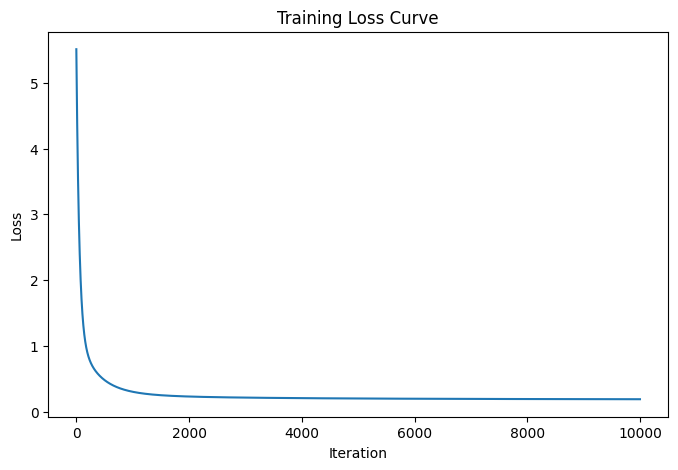

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
ax.plot(range(len(loss)), loss)
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.set_title('Training Loss Curve')
plt.savefig('plots/loss_curve.png')
plt.show()

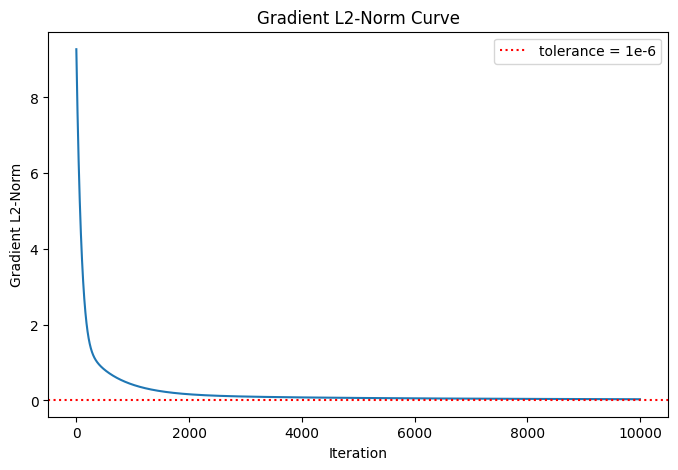

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
ax.plot(range(len(grad)), grad)
ax.axhline(1e-6, color = 'red', linestyle = 'dotted', label = 'tolerance = 1e-6')
ax.set_xlabel('Iteration')
ax.set_ylabel('Gradient L2-Norm')
ax.set_title('Gradient L2-Norm Curve')
ax.legend()
plt.savefig('plots/gradient_norm_curve.png')
plt.show()

In [15]:
batch_sizes = [32, 64, 96, 128, X_train.shape[0], 1]
losses = []
grads = []

for batch_size in batch_sizes:
    model = LinearRegression()
    beta, loss, grad = model.fit(X_train, y_train, batch_size=batch_size, random_state = 611)
    losses.append(loss)
    grads.append(grad)

Fit complete in iteration 10000


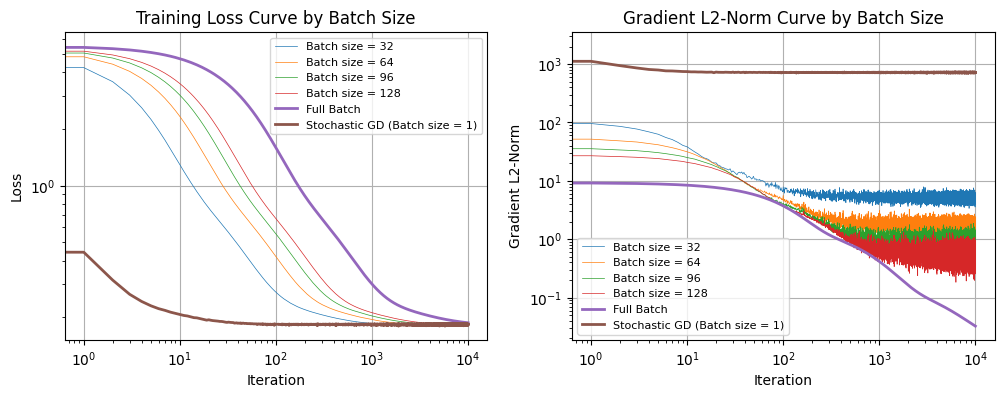

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
for idx in [0, 1, 2, 3]:
    ax[0].loglog(range(len(losses[idx])), losses[idx], label = f'Batch size = {(idx+1)*32}', linewidth = 0.5)
    ax[1].loglog(range(len(grads[idx])), grads[idx], label = f'Batch size = {(idx+1)*32}', linewidth = 0.5)
ax[0].loglog(range(len(losses[4])), losses[4], label = f'Full Batch', linewidth = 2) # full batch GD
ax[1].loglog(range(len(grads[4])), grads[4], label = f'Full Batch', linewidth = 2) # full batch GD
ax[0].loglog(range(len(losses[5])), losses[5], label = f'Stochastic GD (Batch size = 1)', linewidth = 2) # stochastic GD
ax[1].loglog(range(len(grads[5])), grads[5], label = f'Stochastic GD (Batch size = 1)', linewidth = 2) # stochastic GD
ax[0].set_title('Training Loss Curve by Batch Size')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].grid()
ax[1].set_title('Gradient L2-Norm Curve by Batch Size')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Gradient L2-Norm')
ax[1].grid()
ax[0].legend(loc = 'best', fontsize = '8')
ax[1].legend(loc = 'lower left', fontsize = '8')
plt.savefig('plots/batch_size_comparison_convergence.png')
plt.show()

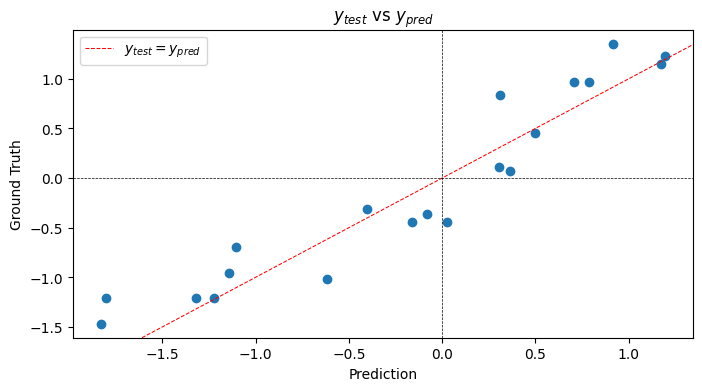

In [29]:
y_pred = lin_reg_model.predict(X_test).reshape(y_test.shape)
fig, ax = plt.subplots(1,1, figsize = (8,4))
ax.scatter(y_pred, y_test)
ax.axline([0, 0], [1, 1], color = 'red', linestyle = 'dashed', linewidth = 0.75, label = r"$y_{test} = y_{pred}$")
ax.axhline(0, linestyle = 'dashed', color = 'black', linewidth = 0.5)
ax.axvline(0, linestyle = 'dashed', color = 'black', linewidth = 0.5)
ax.legend()
ax.set_title(r'$y_{test}$ vs $y_{pred}$')
ax.set_ylabel('Ground Truth')
ax.set_xlabel('Prediction')
plt.savefig('plots/pred_vs_test.png')
plt.show()

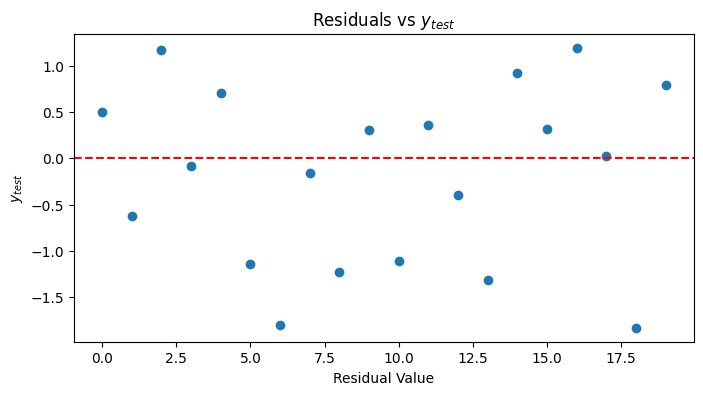

In [39]:
residuals = y_pred - y_test
fig, ax = plt.subplots(1, 1, figsize = (8,4))
ax.scatter(range(len(residuals)), y_pred)
ax.axhline(0, color = 'red', linestyle = 'dashed')
ax.set_title(r'Residuals vs $y_{test}$')
ax.set_xlabel('Residual Value')
ax.set_ylabel(r'$y_{test}$')
plt.savefig('plots/residuals_vs_predictions.png')
plt.show()

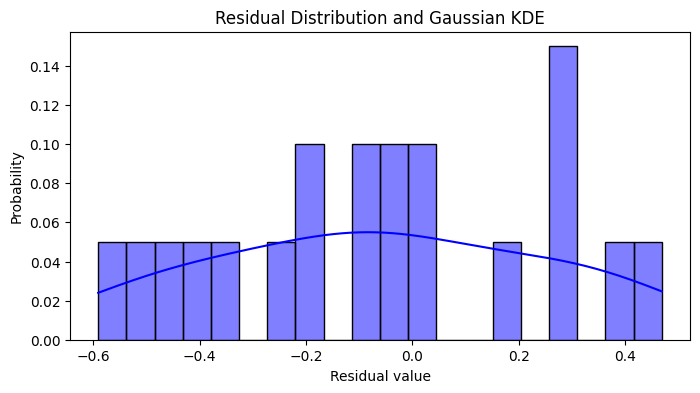

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (8,4))
sns.histplot(residuals.reshape(-1, ), kde = True, bins = 20, color = 'blue', edgecolor = 'black', stat = 'probability')
ax.set_title('Residual Distribution and Gaussian KDE')
ax.set_xlabel('Residual value')
plt.savefig('plots/residual_histogram.png')
plt.show()

### Feature Analysis and Tuning

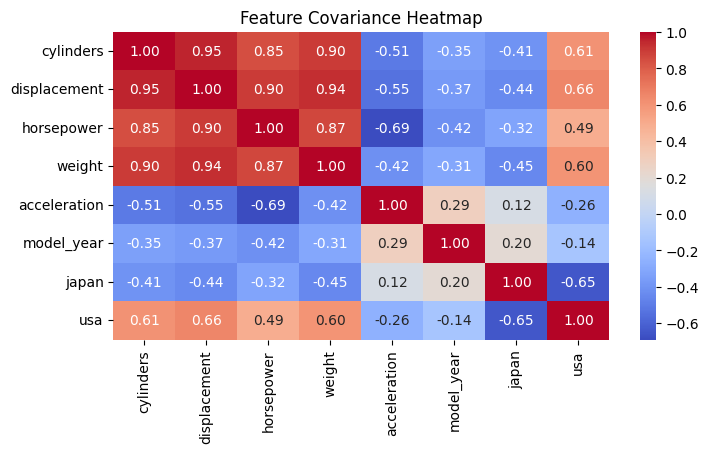

In [89]:
cov_matrix = np.cov(X, rowvar = False)
feature_names = list(mpg.drop('mpg', axis = 'columns').columns)
cov_matrix_df = pd.DataFrame(data = cov_matrix, index = feature_names, columns = feature_names)

fig, ax = plt.subplots(1,1, figsize = (8,4))
sns.heatmap(cov_matrix_df, annot = True, cmap = 'coolwarm', fmt = '.2f')
ax.set_title('Feature Covariance Heatmap')
plt.savefig('plots/covariance_matrix.png')
plt.show()

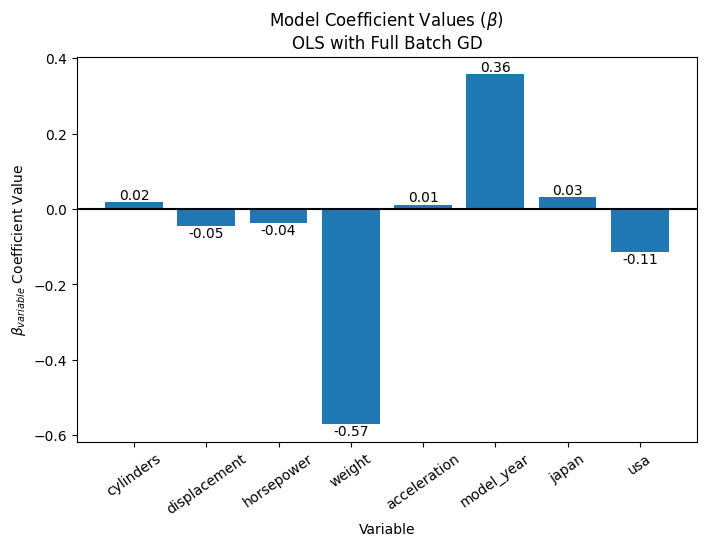

In [140]:
beta = lin_reg_model.beta
fig, ax = plt.subplots(1,1, figsize = (8,5))
bars = ax.bar(feature_names, beta[:-1])
ax.axhline(0, color = 'black')
ax.set_title(r'Model Coefficient Values ($\beta$)' '\n' 'OLS with Full Batch GD')
ax.set_xlabel('Variable')
ax.set_ylabel(r'$\beta_{variable}$ Coefficient Value')
ax.set_xticks(range(len(beta[:-1])), feature_names, rotation = 35)
ax.bar_label(bars, fmt = '%.2f')
plt.savefig('plots/coefficient_magnitudes.png')
plt.show()

In [116]:
betas_ridge = []
betas_lasso = []
lmbdas = [0.01, 0.1, 1]
for lmbda in lmbdas:
    model = LinearRegression()
    model.fit(X_train, y_train, random_state = 611, lmbda = lmbda, method = 'ridge')
    betas_ridge.append(model.beta)
    model.fit(X_train, y_train, random_state = 611, lmbda = lmbda, method = 'lasso')
    betas_lasso.append(model.beta)

Fit complete in iteration 10000


In [134]:
# prep barplots
barwidth = 0.1
r = np.arange(len(betas_ridge[0][:-1]))
print(r.shape)
r1 = r + barwidth
r2 = r1 + barwidth
r3 = r2 + barwidth
r4 = r3 + barwidth
r5 = r4 + barwidth 
r6 = r5 + barwidth

(8,)


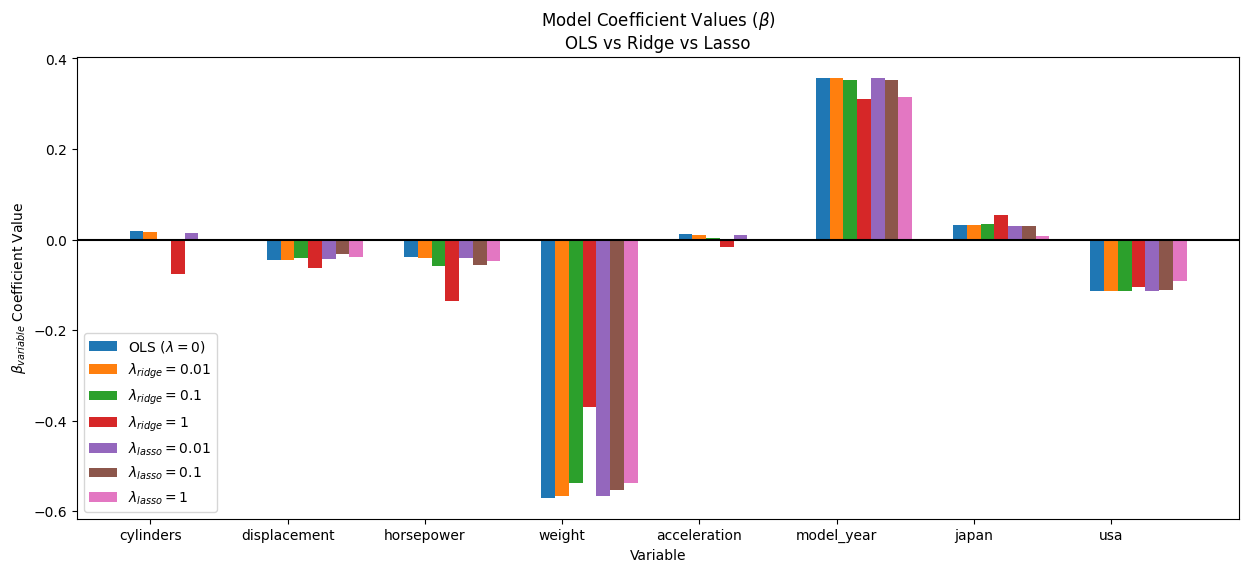

In [141]:
fig, ax = plt.subplots(1,1, figsize = (15,6))
ax.bar(r, beta[:-1], width = barwidth, label = r'OLS ($\lambda = 0$)')
ax.bar(r1, betas_ridge[0][:-1], width = barwidth, label = r'$\lambda_{ridge} = 0.01$')
ax.bar(r2, betas_ridge[1][:-1], width = barwidth, label = r'$\lambda_{ridge} = 0.1$')
ax.bar(r3, betas_ridge[2][:-1], width = barwidth, label = r'$\lambda_{ridge} = 1$')
ax.bar(r4, betas_lasso[0][:-1], width = barwidth, label = r'$\lambda_{lasso} = 0.01$')
ax.bar(r5, betas_lasso[1][:-1], width = barwidth, label = r'$\lambda_{lasso} = 0.1$')
ax.bar(r6, betas_lasso[2][:-1], width = barwidth, label = r'$\lambda_{lasso} = 1$')
ax.legend(loc = 'best')
ax.axhline(0, color = 'black')
ax.set_title(r'Model Coefficient Values ($\beta$)' '\n' 'OLS vs Ridge vs Lasso')
ax.set_xlabel('Variable')
ax.set_ylabel(r'$\beta_{variable}$ Coefficient Value')
ax.set_xticks(r + barwidth)
ax.set_xticklabels(feature_names)
plt.savefig('plots/coefficient_vals_across_methods.png')
plt.show()